# Project Name: Wine Quality(Classification Problem)


## Step By Step Process to Solve a Data Science Problem



# Step 1: Define the Problem
For this project, the problem statement is given to us to develop an algorithm to predict the quality pf the wine at what standards the wine is present.

**Summary of the problem:**
- According to  the publisher of this dataset suggests; due to privacy issues, only inputs and the output variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

- This specific dataset can be viewed as classification task. 

- The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). As the publisher suggest, we will classify the wines by setting an arbitrary cutoff for our dependent variable (wine quality) .If the wine quality is higher we can divide based on the bins we have in the data.

# Step 2: Gather the Data
Data gather is main step for further data process we have many ways to gather the data 
* By webscraping from pages
* By surveys(it is difficult to collect huge data by surveys)
* By collecting data from top open sites like Kaggle,kdnuggets,UCI,Google dataset Etc.,

Here the dataset is taken from kaggle with test and train data at [Kaggle's Red wine quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/)

# Step 3: Data preprocessing 

# Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [1]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


### Import libraries for EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns


# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
#import the dataset from the location
#It is the best practice to copy and preform data preprocessing on that data
df=pd.read_csv('winequality_dataset.csv')
df_Train=df.copy(deep= True)

In [4]:
df_Train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


* In the dataset above,quality is out target variable. 
* We have to predict whether the quality of wine is good or bad.

## All about features in dataset
Input Variables:
- **fixed acidity: ** most acids involved with wine or fixed or nonvolatile
- **volatile acidity: ** the amount of acetic acid in wine
- **citric acid: ** found in small quantities, citric acid can add 'freshness' and flavor to wines 
- **residual sugar: ** the amount of sugar remaining after fermentation stops
- **chlorides: ** the amount of salt in the wine
- **free sulfur dioxide: ** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- **total sulfur dioxide: ** amount of free and bound forms of S02
- **density: ** the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH: ** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **sulphates: ** a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- **alcohol: ** the percent alcohol content of the wine<br>

Output Variable:
- **quality: ** output variable (based on sensory data, score between 0 and 10)

In [5]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df_Train),len(df_Train.columns)))

Input data has 1599 rows and 12 col


In [6]:
#preview of the data
print(df_Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


- From the above info we came to know there are no null values in the data set and all variables are float and int there is object variables.

In [7]:
# Descriptive measures of data
df_Train.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* <b>count</b> is the total number of non null obervations in each column.
* <b>mean</b> is the mean value of all non null observations in each column.
* <b>std</b> is the standard deviation (i.e. measure of variation).
* <b>min,25%,50%,75% and max</b> are obtained after sorting each column in ascending order.
    * <b>min:</b> the smallest value
    * <b>25%</b> the first quartile value
    * <b>50%</b> the second quartile value
    * <b>max</b> the largest value

Now Let's separate model features and model target.

In [8]:
#print all the columns 
print(df_Train.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Missing values

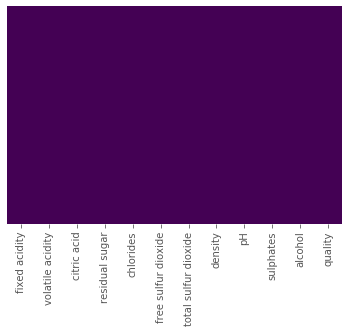

In [9]:
#check for null values in dataset
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- From the heatmap we came to there is no null values present in the dataset.

We can explore the features set further, figuring out first what features are numerical or categorical. Beware that some integer-valued features could actually be categorical features, and some categorical features could be text features. 

In [17]:
import numpy as np
numerical_features_all = df_Train.select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)
print('Numerical columns:',len(numerical_features_all))

print('')

categorical_features_all = df_Train.select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)
print('Categorical columns:',len(categorical_features_all))

Numerical columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Numerical columns: 12

Categorical columns: Index([], dtype='object')
Categorical columns: 0


As we came to understand we dont have any categorical variables in data set and we have 11 numerical features 

## Data visualization

In [18]:
df_Train['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

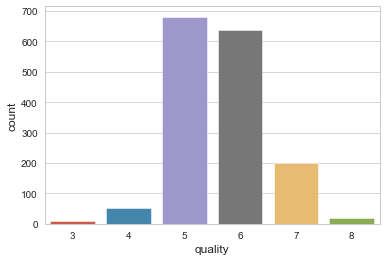

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='quality',data=df_Train)

fixed acidity


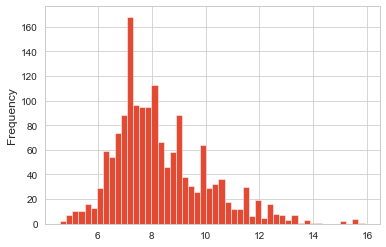

volatile acidity


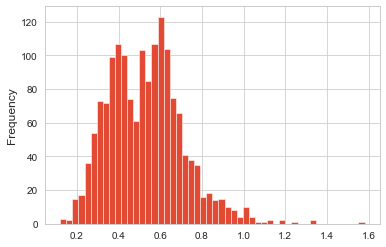

citric acid


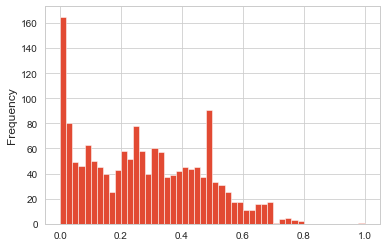

residual sugar


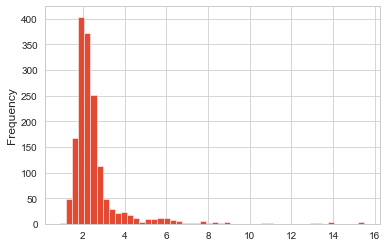

chlorides


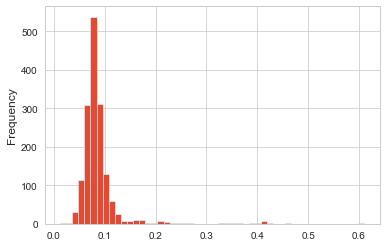

free sulfur dioxide


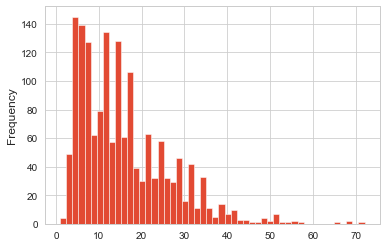

total sulfur dioxide


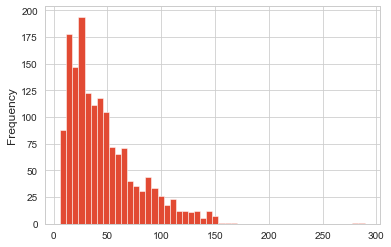

density


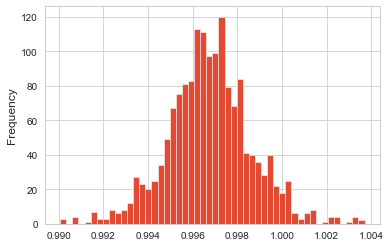

pH


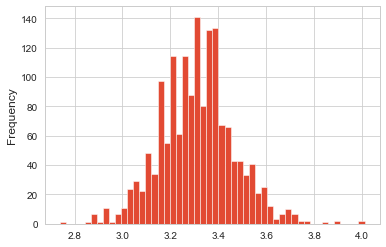

sulphates


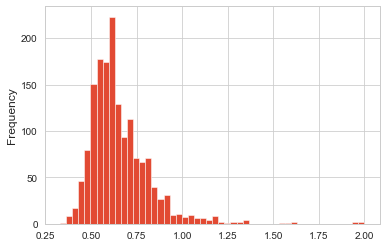

alcohol


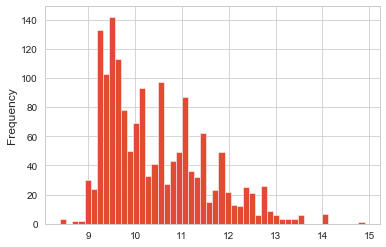

quality


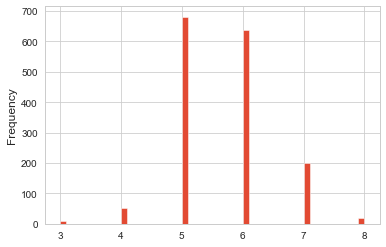

In [20]:
for variables in numerical_features_all:
    print(variables)
    df_Train[variables].plot.hist(bins=50)
    plt.show()

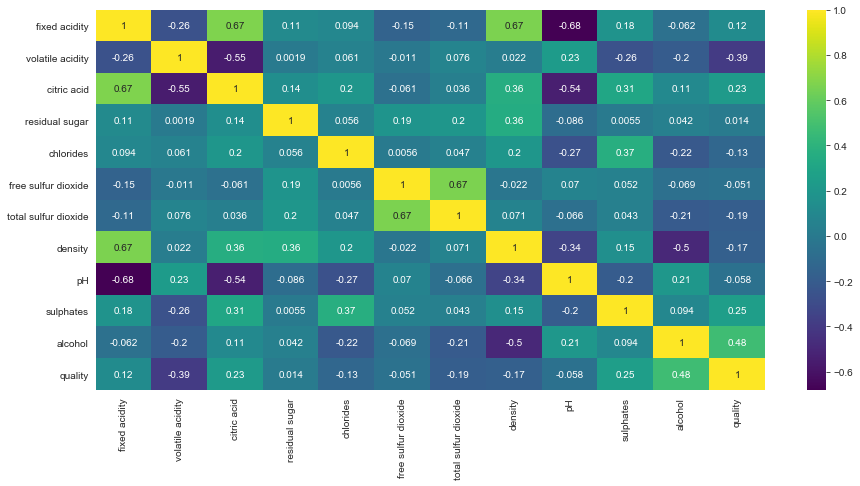

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_Train.corr(),cmap='viridis', annot=True)

## Finding the Outliers

## What is an Outlier?
Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

Criteria to identify an outlier

- Boxplot
- scatterplot

Following approach to handle outliers

- Trimming(remove outliers)
- Treat outliers as missing data and we need to impute with techniques
- Discrestisation
- binning the variables to max or min

This plot show us value of min, max, median and quartile ranges. 


fixed acidity


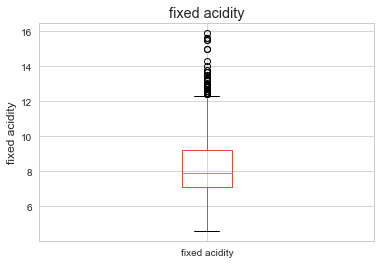

volatile acidity


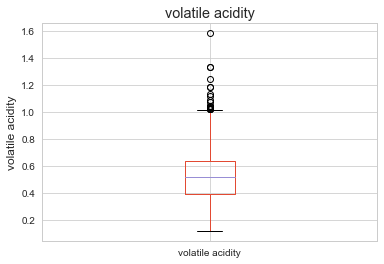

citric acid


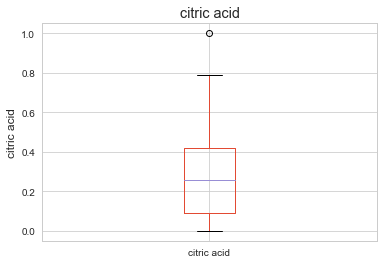

residual sugar


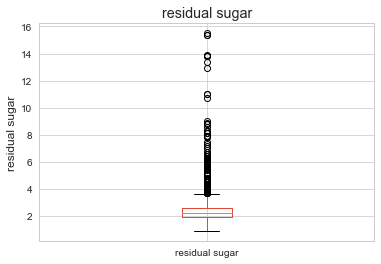

chlorides


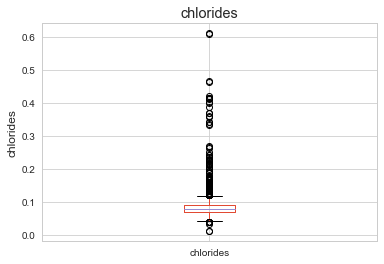

free sulfur dioxide


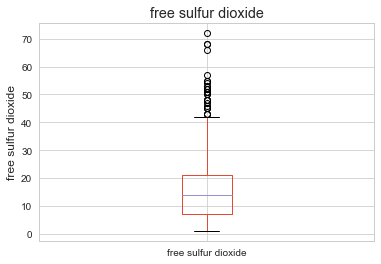

total sulfur dioxide


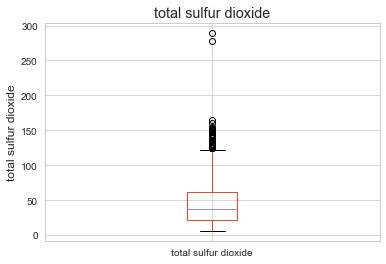

density


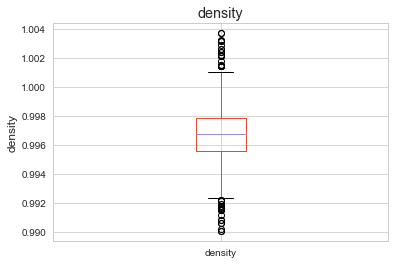

pH


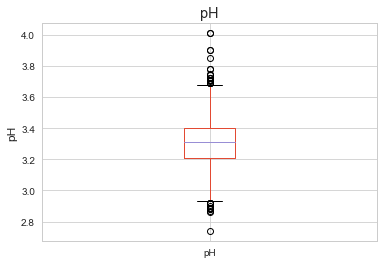

sulphates


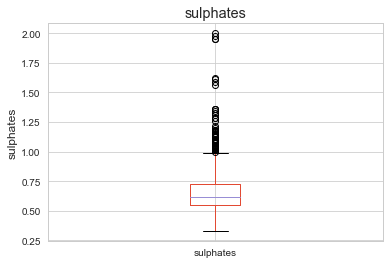

alcohol


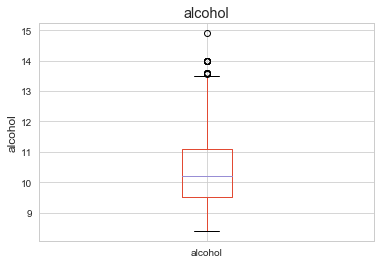

quality


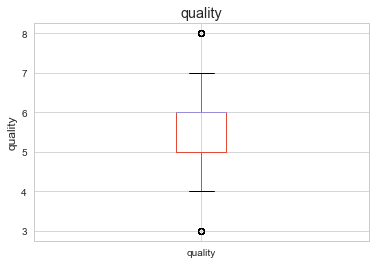

In [22]:
for variables in numerical_features_all:
    print(variables)
    df_Train.boxplot(column=variables)
    plt.ylabel(variables)
    plt.title(variables)
    plt.show()

fixed acidity


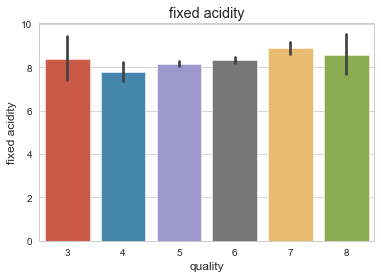

volatile acidity


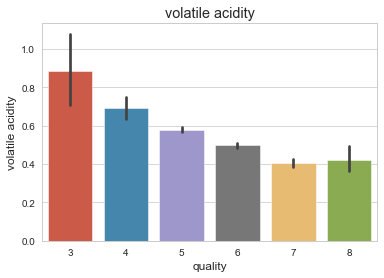

citric acid


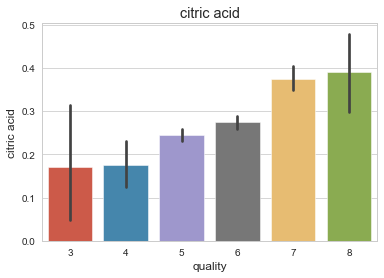

residual sugar


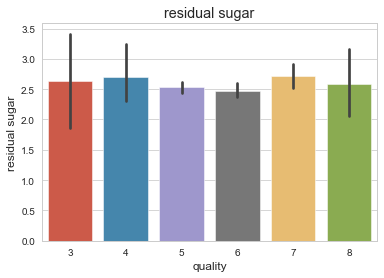

chlorides


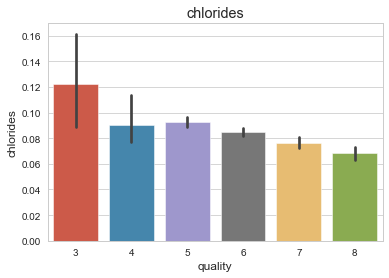

free sulfur dioxide


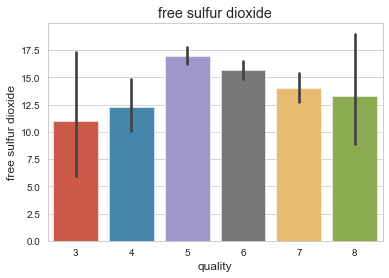

total sulfur dioxide


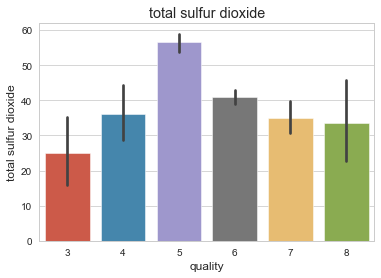

density


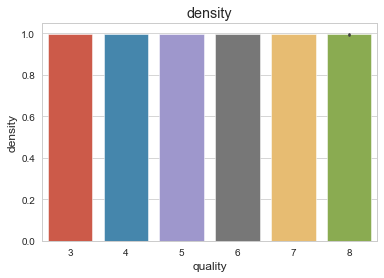

pH


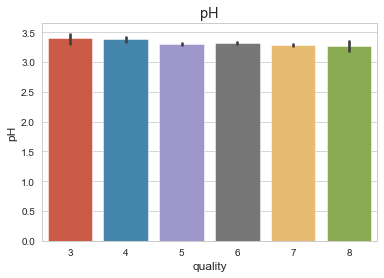

sulphates


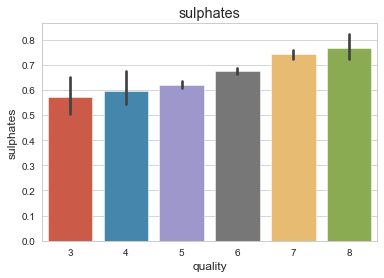

alcohol


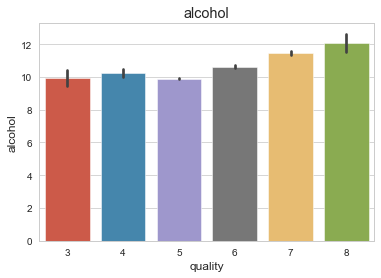

quality


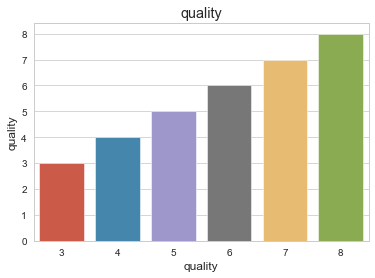

In [23]:
for variables in numerical_features_all:
    print(variables)
    sns.barplot(x='quality',y=variables,data=df_Train)
    plt.ylabel(variables)
    plt.title(variables)
    plt.show()

# Step 4 : Data Preprocessing 

In [24]:
df_Train['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Binning** is when you group a set values into bins
- for example you can bin age into [0 to 10],[11 to 18], [18 to 25] and soon also we can assign a labels to them 
- In the same manner we can assign **quality** variable into bins and can assign labels as good and bad.

In [25]:
df_Train['quality'] = pd.cut(x = df_Train['quality'], bins = (2,6.5,8), labels = ['bad','good'])

In [26]:
df_Train['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [27]:
df_Train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Converting categorical variables into numerical

In [28]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


In [29]:
numerical_features_all = df_Train.select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)
print('Numerical columns:',len(numerical_features_all))

print('')

categorical_features_all = df_Train.select_dtypes(include='category').columns
print('Categorical columns:',categorical_features_all)
print('Categorical columns:',len(categorical_features_all))

Numerical columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Numerical columns: 11

Categorical columns: Index(['quality'], dtype='object')
Categorical columns: 1


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_Train['quality'] = labelencoder.fit_transform(df_Train['quality'])

In [31]:
df_Train['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

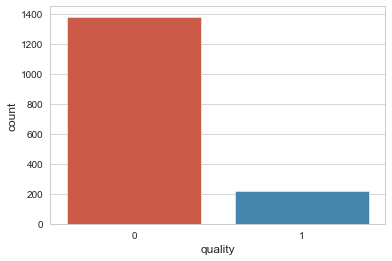

In [32]:
sns.countplot(df_Train['quality'])

In [33]:
X = df_Train.drop('quality', axis = 1).values
y = df_Train['quality'].values.reshape(-1,1)

## Feature scaling
**Feature scaling** the scale of the features is an important consideration when building machine learning models.

**Why Feature magnitude matters?**
- The regression coefficients of linear models directly influenced by the scale of the variables.
- Variables with the bigger magnitude/larger value range dominate over those with smaller magnitude value range.

So,to avoid this we use feature scaling.

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# Step 5: Model prediction

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [36]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1119, 11)
Shape of X_test:  (480, 11)
Shape of y_train:  (1119, 1)
Shape of y_test (480, 1)


In [37]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score #for confusion matrix

## Logistic Regression

In [38]:
#we need to fit and predict the model
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
Cross_score=cross_val_score(lr, X, y, cv = 10,scoring='accuracy').mean() * 100

In [39]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, y_pred))

** confusion_matrix **
[[401  12]
 [ 51  16]]
** Accuracy_Score **
0.87
** Cross_score **
87.49174528301886
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       413
           1       0.57      0.24      0.34        67

    accuracy                           0.87       480
   macro avg       0.73      0.60      0.63       480
weighted avg       0.84      0.87      0.84       480



## Support vector machine

In [40]:
#create a model and predict 
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
Cross_score=cross_val_score(svc, X, y, cv = 10,scoring='accuracy').mean() * 100

In [41]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, y_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
86.42924528301886
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       413
           1       1.00      0.01      0.03        67

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.80       480



## KNearest neighbours

In [42]:
#create a model and predict
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
Cross_score=cross_val_score(knn, X, y, cv = 10,scoring='accuracy').mean() * 100

In [43]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test,knn_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
84.55424528301887
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       413
           1       0.48      0.19      0.28        67

    accuracy                           0.86       480
   macro avg       0.68      0.58      0.60       480
weighted avg       0.83      0.86      0.83       480



## GaussianNB

In [44]:
#create a model and predict
NB = GaussianNB()
NB.fit(X_train,y_train)
NB_pred = NB.predict(X_test)
Cross_score=cross_val_score(NB, X, y, cv = 10,scoring='accuracy').mean() * 100

In [45]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, NB_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
83.11713836477986
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       413
           1       0.46      0.72      0.56        67

    accuracy                           0.84       480
   macro avg       0.71      0.79      0.73       480
weighted avg       0.88      0.84      0.86       480



## Random Forest

In [46]:
#create a model and predict
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)
Rf_pred = Rf.predict(X_test)
Cross_score=cross_val_score(Rf, X, y, cv = 10,scoring='accuracy').mean() * 100

In [47]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, Rf_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
87.11792452830188
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       413
           1       0.62      0.48      0.54        67

    accuracy                           0.89       480
   macro avg       0.77      0.71      0.74       480
weighted avg       0.88      0.89      0.88       480



## Decision Tree

In [48]:
#create a model and predict
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
Cross_score=cross_val_score(NB, X, y, cv = 10,scoring='accuracy').mean() * 100

In [49]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, dt_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
83.11713836477986
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       413
           1       0.53      0.64      0.58        67

    accuracy                           0.87       480
   macro avg       0.74      0.77      0.75       480
weighted avg       0.88      0.87      0.88       480



## XGB classifier

In [50]:
#create a model and predict
Xgb = xgb.XGBClassifier()
Xgb.fit(X_train,y_train)
Xgb_pred = Xgb.predict(X_test)
Cross_score=cross_val_score(Xgb, X, y, cv = 10,scoring='accuracy').mean() * 100

In [51]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, Xgb_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
87.11792452830188
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       413
           1       0.54      0.33      0.41        67

    accuracy                           0.87       480
   macro avg       0.72      0.64      0.67       480
weighted avg       0.85      0.87      0.85       480



## SGDclassifier

In [52]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
Cross_score=cross_val_score(sgd, X, y, cv = 10,scoring='accuracy').mean() * 100

In [53]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, y_pred))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,y_pred),2))
print('*'*2,'Cross_score','*'* 2)
print(Cross_score)
print(classification_report(y_test, Xgb_pred))

** confusion_matrix **
[[413   0]
 [ 66   1]]
** Accuracy_Score **
0.86
** Cross_score **
84.11674528301886
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       413
           1       0.54      0.33      0.41        67

    accuracy                           0.87       480
   macro avg       0.72      0.64      0.67       480
weighted avg       0.85      0.87      0.85       480



## Hyperparameter tunning
**Random forest**

In [54]:
Rf = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Parameter grid for GridSearch
param_grid={'max_depth': [100, 200, 300,400], 
            'min_samples_leaf': [5,10, 15,25],
            'min_samples_split': [2, 5, 10]
           }

grid_search = GridSearchCV(Rf, # Base model
                           param_grid, # Parameters to try
                           cv = 10, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1 # Use all available processors
                          )

# Fit the GridSearch to our training data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 300, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.9061936936936936


In [57]:
# Get the best model out of GridSearchCV
Rf = grid_search.best_estimator_

# Fit the best model to the train data once more
Rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
predictions=Rf.predict(X_test)

In [59]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, predictions))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,predictions),2))
print(classification_report(y_test, predictions))

** confusion_matrix **
[[399  14]
 [ 46  21]]
** Accuracy_Score **
0.88
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       413
           1       0.60      0.31      0.41        67

    accuracy                           0.88       480
   macro avg       0.75      0.64      0.67       480
weighted avg       0.86      0.88      0.86       480



In [60]:
lr = LogisticRegression()

In [61]:
# define models and parameters
param_grid={'penalty': ['l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100,1000,2000]}
grid_search = GridSearchCV(lr, param_grid=param_grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)

In [62]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=0,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [63]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1000, 'penalty': 'l2'}
0.892784749034749


In [64]:
# Get the best model out of GridSearchCV
lr = grid_search.best_estimator_

# Fit the best model to the train data once more
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predictions=lr.predict(X_test)

In [66]:
print('*' * 2,'confusion_matrix', '*' * 2)
print(confusion_matrix(y_test, predictions))
print('*' * 2,'Accuracy_Score','*' * 2)
print(round(accuracy_score(y_test,predictions),2))
print(classification_report(y_test, predictions))

** confusion_matrix **
[[396  17]
 [ 46  21]]
** Accuracy_Score **
0.87
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       413
           1       0.55      0.31      0.40        67

    accuracy                           0.87       480
   macro avg       0.72      0.64      0.66       480
weighted avg       0.85      0.87      0.85       480



Finally I will choose random forest predictions as it has a good accuracy when compare to Logistic regression we have choose not only based on accuracy we also must check the precision and recall values to so that we can choose better model.